# Exam 18-09-2023

In [3]:
import matplotlib.pyplot as plt 
import scipy.stats as sc
import numpy as np 
import sys
sys.path.append('/home/gio/Desktop/LaboratorioCalcoloEStatistica')
from mylib.basics import sturges


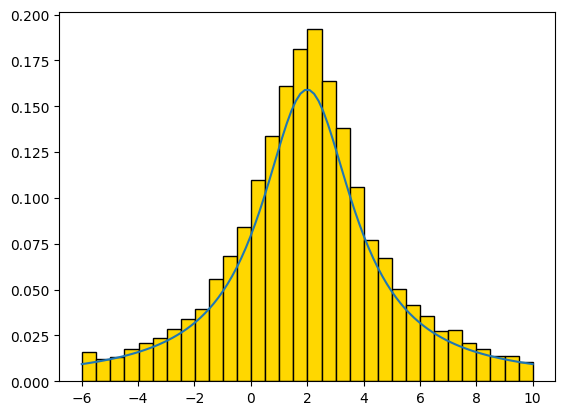

In [7]:
def f_cauchy(x,M,G):
    return 1/np.pi * G / ((x-M)**2 + G**2)

def rand_TAC_cauchy(M,G,L05,size):
    d = np.empty(size,dtype=np.float64)
    count = 0
    ylim = f_cauchy(M,M,G)
    while count < size:
        x = M - L05 + np.random.rand()*2*L05
        y = np.random.rand() * ylim
        if y <= f_cauchy(x,M,G):
            d[count] = x
            count += 1
    return d


M,G = 2,2
N = 10000
data = rand_TAC_cauchy(M,G,4*G,N)

x = np.linspace(M-4*G,M+4*G,100)
plt.hist(data,bins=sturges(N),density=True,edgecolor='black',color='gold')
plt.plot(x,f_cauchy(x,M,G))
plt.show()

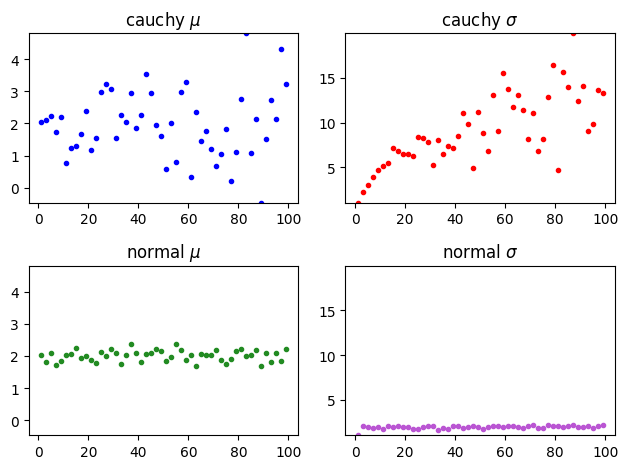

In [20]:
start,stop,step = 1,100,2

I = np.arange(start,stop,step)
L,size = len(I),100
m = np.empty(L,dtype=np.float64)
s = np.empty(L,dtype=np.float64)

for g,i in enumerate(I):
    data = rand_TAC_cauchy(M,G,i*G,size)
    m[g] = data.mean()
    s[g] = data.std()

## normal distribution comparison
    
def rand_TAC_norm(m,s,L05,size):
    d = np.empty(size,dtype=np.float64)
    count = 0
    ylim = sc.norm.pdf(m,m,s)
    while count < size:
        x = m - L05 + np.random.rand()*2*L05
        y = np.random.rand() * ylim
        if y <= sc.norm.pdf(x,m,s):
            d[count] = x
            count += 1
    return d

mg=np.empty(L,dtype=np.float64)
sg=np.empty(L,dtype=np.float64)

for g,i in enumerate(I):
    data = rand_TAC_norm(2,2,i*2,size)
    mg[g] = data.mean()
    sg[g] = data.std()

ymmin,ymmax = np.min(m),np.max(m)
ysmin,ysmax = np.min(s),np.max(s)

fig, ax = plt.subplots(ncols=2,nrows=2)
ax[0][0].scatter(I,m,marker='.',color='blue')
ax[0][0].set_title('cauchy $\mu$')
ax[0][0].set_ylim(ymmin,ymmax)
ax[0][1].scatter(I,s,marker='.',color='red')
ax[0][1].set_title('cauchy $\sigma$')
ax[0][1].set_ylim(ysmin,ysmax)

ax[1][0].scatter(I,mg,marker='.',color='forestgreen')
ax[1][0].set_title('normal $\mu$')
ax[1][0].set_ylim(ymmin,ymmax)
ax[1][1].scatter(I,sg,marker='.',color='mediumorchid')
ax[1][1].set_title('normal $\sigma$')
ax[1][1].set_ylim(ysmin,ysmax)
plt.tight_layout()
plt.show()

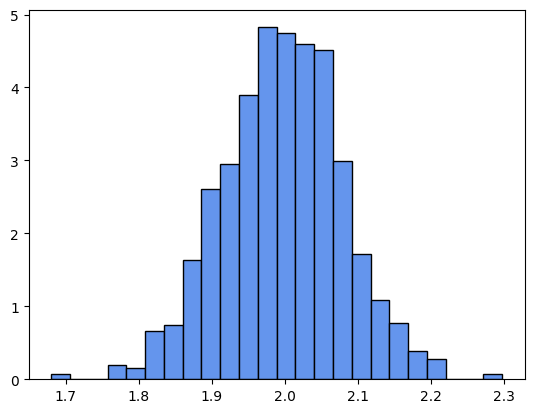

In [24]:
def rand_TCL_cauchy(size):
    return [rand_TAC_cauchy(2,0.1,10,100).mean() for _ in range(size)]

plt.hist(rand_TCL_cauchy(1000),bins=sturges(1000),edgecolor='black',color='cornflowerblue',density=True)
plt.show()